In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Theory
 - Sampling strategy has a great effect on our entire analysis scheme. Therefore we want to learn the techniques useful for obtaining the sample such that, analysis done on sample should be applicable on population as well.
 - In this notebook, we will try to understand that how good/not goof a random sample is. We will try to compare it to the results obtained from population as well.

In [135]:
Population_Df = pd.read_excel('./student_survey.xls')
Random_Sample_Df = Population_Df.sample(frac=0.10)

def remove_missing_var_Verbal(df):
    return df[df['Verbal'] != '*']

In [31]:
print('Size of population is %s' % (Population_Df.shape, ))
print('Size of sample is %s' % (Random_Sample_Df.shape, ))
Random_Sample_Df.head(1)

Size of population is (1129, 5)
Size of sample is (113, 5)


,Course,Handed,Sex,Verbal,Age
1051,Business,right,male,620,22


## Comparing `Handed` variable

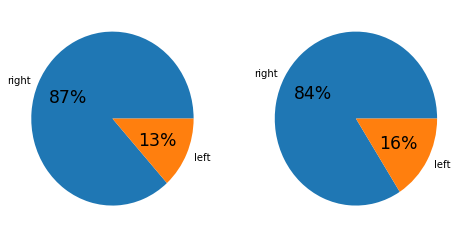

In [89]:
pop_labels = Population_Df.Handed.value_counts().index
pop_values = Population_Df.Handed.value_counts().values

smpl_labels = Random_Sample_Df.Handed.value_counts().index
smpl_values = Random_Sample_Df.Handed.value_counts().values

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(4)

patches, texts, pop_autotexts = axes[0].pie(pop_values, labels=pop_labels, autopct='%.0f%%')
patches, texts, smpl_autotexts  = axes[1].pie(smpl_values, labels=smpl_labels, autopct='%.0f%%')
for t in pop_autotexts: t.set_size('xx-large')
for t in smpl_autotexts: t.set_size('xx-large')
plt.show()

- We can see that distribution of `Handed` variable does not vary much (is within the 5% range from population), hence this sampling is good as far as `Handed` variable is concerned.

## Comparing `Sex` variable

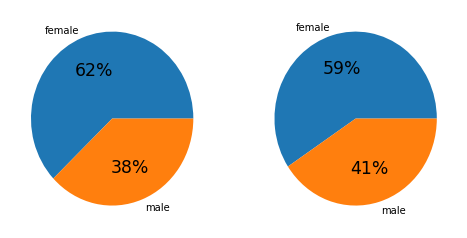

In [93]:
pop_labels = Population_Df.Sex.value_counts().index
pop_values = Population_Df.Sex.value_counts().values

smpl_labels = Random_Sample_Df.Sex.value_counts().index
smpl_values = Random_Sample_Df.Sex.value_counts().values

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(4)

patches, texts, pop_autotexts = axes[0].pie(pop_values, labels=pop_labels, autopct='%.0f%%')
patches, texts, smpl_autotexts  = axes[1].pie(smpl_values, labels=smpl_labels, autopct='%.0f%%')
for t in pop_autotexts: t.set_size('xx-large')
for t in smpl_autotexts: t.set_size('xx-large')
plt.show()

-  We are good with `Sex` variable as well. Distribution seems to be fairly similar.

## Comparing `Verbal` variable

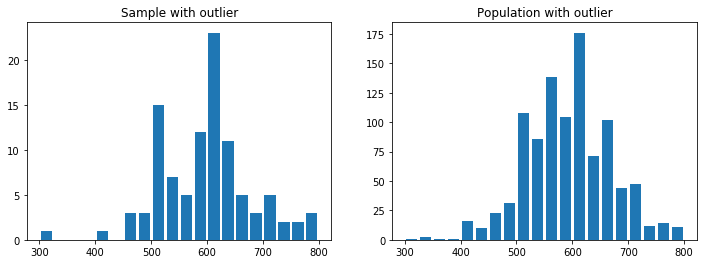

In [211]:
def change_verbal_to_arr(df):
    verbal = np.array(df[df['Verbal'] != '*']['Verbal'])
    return verbal.reshape(verbal.shape[0], 1)

def remove_verbal_outlier_if_any(verbal):
    verbal = verbal[verbal>400]
    verbal = verbal.reshape(verbal.shape[0], 1)
    return verbal;

smpl_verbal = change_verbal_to_arr(Random_Sample_Df)
pop_verbal = change_verbal_to_arr(Population_Df)
num_of_bins = 20;

fig, axes = plt.subplots(1, 2)

fig.set_figwidth(12)
axes[0].hist(smpl_verbal, bins=num_of_bins, rwidth=0.8)
axes[0].set_title('Sample with outlier')

axes[1].hist(pop_verbal, bins=num_of_bins, rwidth=0.8)
axes[1].set_title('Population with outlier')
plt.show()

 - This view suggests that both sample and population are normally distributed.
 - The way values are distributed does vary. Ex 
     - Population seems to have few potential outliers (<350). However, sample may or may not have those values. So we can do following exercise:
         - Remove the outlier and repaint the graph.
         - Compare the statistics which are not affected by outliers.

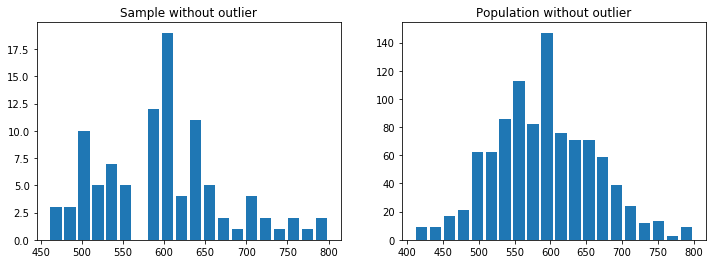

In [210]:
smpl_verbal = change_verbal_to_arr(Random_Sample_Df)
pop_verbal = change_verbal_to_arr(Population_Df)

smpl_verbal = remove_verbal_outlier_if_any(smpl_verbal)
pop_verbal = remove_verbal_outlier_if_any(pop_verbal)
num_of_bins = 20;

fig, axes = plt.subplots(1, 2)

fig.set_figwidth(12)
axes[0].hist(smpl_verbal, bins=num_of_bins, rwidth=0.8)
axes[0].set_title('Sample without outlier')

axes[1].hist(pop_verbal, bins=num_of_bins, rwidth=0.8)
axes[1].set_title('Population without outlier')
plt.show()

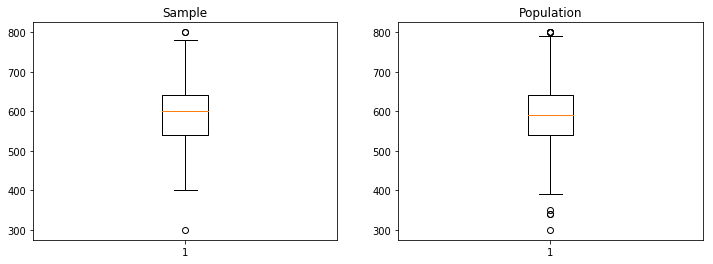

In [213]:
smpl_verbal = change_verbal_to_arr(Random_Sample_Df)
pop_verbal = change_verbal_to_arr(Population_Df)

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)

axes[0].boxplot(smpl_verbal)
axes[0].set_title('Sample')

axes[1].boxplot(pop_verbal)
axes[1].set_title('Population')
plt.show()

- boxplot seems to be fairly similar, this suggest most of the data is situated in same region.
    -  `Q3-Q1` is almost identical.
    - span of tail and head are also quite similar, which suggest boundaries are at similar span.
- So, box plot suggest the distribution of data without taking outlier into account. In our case, sample seems to be good enough.
- Unanswered question
    - population has more outliers than sample, how do they affect the distribution overall.
    

In [207]:
smpl_verbal_stats = pd.Series(smpl_verbal.reshape(smpl_verbal.shape[0], ), dtype='float').describe()
pop_verbal_stats = pd.Series(pop_verbal.reshape(pop_verbal.shape[0], ), dtype='float').describe()
pd.DataFrame({
    'sample_verbal': smpl_verbal_stats,
    'population_verbal': pop_verbal_stats 
})

,sample_verbal,population_verbal
count,101.000000,998.000000
mean,592.574257,588.780561
std,82.784702,76.081470
min,300.000000,300.000000
25%,540.000000,540.000000
50%,600.000000,590.000000
75%,640.000000,640.000000
max,800.000000,800.000000


- Since mean of the sample and population doesn't vary too much. So, it seems to be fair enough.

`Doubt`
    - Should we pull out all the outliers prior to taking sample ? 

## Comparing `Age` variable

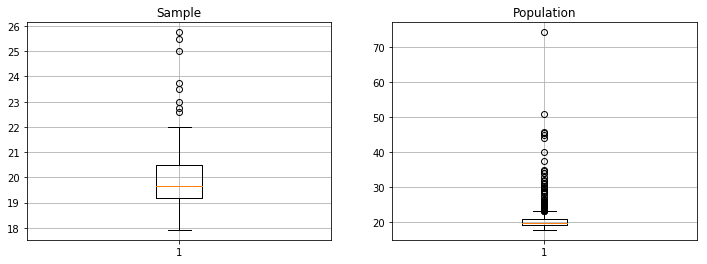

In [254]:
def remove_age_missing_val(df):
    return df[df['Age'] != '*']


smpl_age = remove_age_missing_val(Random_Sample_Df)['Age'].apply(lambda x: float(x))
pop_age = remove_age_missing_val(Population_Df)['Age'].apply(lambda x: float(x))

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)

axes[0].boxplot(smpl_age)
axes[0].set_title('Sample')
axes[0].grid()

axes[1].boxplot(pop_age)
axes[1].set_title('Population')
axes[1].grid()
plt.show()


In [255]:
pd.DataFrame(
    {
        'Population_Age': pop_age.describe(),
        'Sample_Age': smpl_age.describe()
    })

,Population_Age,Sample_Age
count,1123.000000,113.000000
mean,20.374898,19.991062
std,3.188835,1.442229
min,17.670000,17.920000
25%,19.080000,19.170000
50%,19.670000,19.670000
75%,20.670000,20.500000
max,74.170000,25.750000


- Population seems to vary a lot, which increases the `std-dev` for population. Rest of the stats looks reasonable.
    
**Question** What can be done now in order to fix this issue ?
 - Draw another sample.
 - Remove outlier from population itself.